# DSitW assigment 1
### Pick and apply two different predictive methods (of your choice) to predict whether the customers churned in the given period. 

#### 1. Describe and summarize the data (one slide).
#### 2. Produce two visualizations of the data that are meaningful to the presentation. Explain (in one sentence for each figure) why do you think them meaningful (two slides)
#### 3. Explain your method (one slide). Which predictive methods does the best on predicting customer churn? Provide an explanation that is based on formal evaluation methods. Good samples are k-fold cross-validation of accuracy and ROC curve. You should evaluate your models on dedicated subsets of data that are not involved in training.
##### a. Is the data balanced? If not, how does this affect your evaluation? What have you done to minimize its impact? (Hint: what is the accuracy of a prediction method that always outputs “No”?)
#### 4. Report the correlations between data entries and customer churn based on your predictive models (one slide).
#### 5. Provide recommendations for reducing churn, based on the data (one slide)

# Import and process data

In [1]:
#import the csv data into a data frame for exploration
import pandas as pd
initial_df = pd.read_csv('/Users/jonathan/Desktop/DSW_Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [2]:
#Get a sense of the data
initial_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#explore data types
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#Find categorical columns that can be on-hot encoded
columns = list(initial_df)
cat =[]
for i in columns:
    if initial_df[i].dtype =='object':
        if i != 'customerID' and i != 'TotalCharges':
            cat.append(i)
print(cat)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [5]:
#look at unique values in each cat column 
for i in cat:
    print (initial_df[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [6]:
#change totalcharges to numberic and allow nans. Detected these nans by noticing that TotalCharges appeared as an object dtype
initial_df['TotalCharges']=pd.to_numeric(initial_df['TotalCharges'],errors='coerce')



In [7]:
#one-hot encode cat calumns and create a new df
hot_df = pd.get_dummies(initial_df, columns = cat, drop_first=True)
hot_df.head()

#it appreas that all columns are represented

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [8]:
hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                

In [9]:
hot_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#drop customerId since it is not needed
hot_df.drop(['customerID'],axis =1, inplace = True)

In [11]:
#detected Nans with the SVM, so search for nans
hot_df.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [12]:
#Since there are only 11 rows with nans, I'll just drop Nans
hot_df.dropna(inplace=True)

# Explore data

In [13]:
#look at corr of all variables
import matplotlib.pyplot as plt

plt.matshow(hot_df.corr())

#not helptul

In [14]:
#what percent of the data is of customers that "churned"
hot_df['Churn_Yes'].sum()/hot_df['Churn_Yes'].count()

0.26578498293515357

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f370e10>,
      dtype=object)

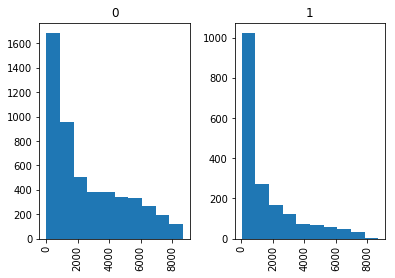

In [15]:
#look at the relationship between churn and total charges
hot_df.hist(column ='TotalCharges', by='Churn_Yes')

# Split test and training data

In [16]:
from sklearn.model_selection import train_test_split

X, y = hot_df.loc[:, hot_df.columns != 'Churn_Yes'], hot_df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Balance Data

In [17]:
#Check the balance of data
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Percent of data that is class churn " +  str(sum(y_train==1)/((sum(y_train==1)+sum(y_train==0)))))

Before OverSampling, counts of label '1': 1259
Before OverSampling, counts of label '0': 3452 

Percent of data that is class churn 0.26724686902992995


In [18]:
#balance data by using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (6904, 30)
After OverSampling, the shape of train_y: (6904,) 

After OverSampling, counts of label '1': 3452
After OverSampling, counts of label '0': 3452


# Run Models

### Random Forest

In [52]:
from sklearn.metrics import accuracy_score
#random forest with imbalanced data
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy imbalanced data ' + str(acc))

Accuracy imbalanced data 0.7944851357173632


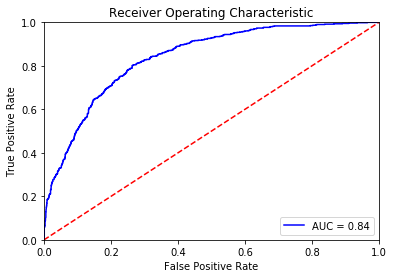

In [38]:
from sklearn import metrics
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix

print('tn, fp, fn, tp')
print(confusion_matrix(y_test, pred).ravel())

tn, fp, fn, tp
[1573  138  339  271]


In [50]:
#random forest with BALANCED data
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
clf.fit(X_train_res, y_train_res)

pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy with balanced data ' + str(acc))

Accuracy with balanced data 0.7716501507970702


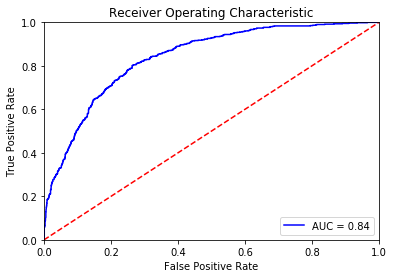

In [39]:
from sklearn import metrics
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix

print('tn, fp, fn, tp')
print(confusion_matrix(y_test, pred).ravel())

tn, fp, fn, tp
[1573  138  339  271]


### Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7992244722102542

In [149]:
clf = LogisticRegression(random_state=42).fit(X_train_res, y_train_res)
clf.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7501077121930203

In [ ]:
from sklearn.metrics import confusion_matrix

print('tn, fp, fn, tp')
print(confusion_matrix(y_test, pred).ravel())

### XGBoost

In [56]:
from xgboost import XGBClassifier 
# fit model to UNBALANCED training data
model = XGBClassifier(learning_rate = 0.05, n_estimators=200, max_depth=4)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy unbalanced data: %.2f%%" % (accuracy * 100.0))


Accuracy unbalanced data: 80.27%


In [58]:
from sklearn.metrics import confusion_matrix

print('tn, fp, fn, tp')
print(confusion_matrix(y_test, y_pred).ravel())

tn, fp, fn, tp
[1541  170  288  322]


#### Had issues using the balanced data in this model

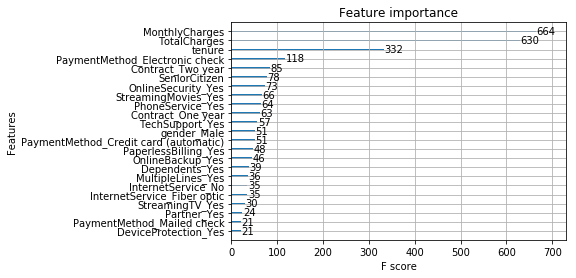

In [155]:
#show feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()
